# Assignment on Machine Learning Principles and Concepts

In this assignment you will deal with the traditional problem of Regression, accompanied by several data engineering techniques like the management of categorical features, feature engineering, normalization, dimensionality reduction, and so on.

You will work in pairs according to your preferences. The solutions will be written inside this notebook. Just place your code below each task. You must also provide comments on the obtained results, as indicated. Of course, you must remove all the example images (i.e. the `Image` commands) that are presented here.

When you complete the assignment:
* Rename the notebook (i.e. the `.ipynb` file) by using your surnames as a file name.
* Go to File &raquo; Download as &raquo; HTML (.html). Download the generated HTML file.
* Compress both the `.ipynb` and `.html` files into a single `.zip` file. Ensure that the `.zip` archive includes just these two files.
* Rename the `.zip` file and use your surnames as a file name.
* Finally, upload it to the e-learning platform.

**Important:** **Both** students of a pair must upload the **same** `.zip` file into the e-learning platform. We will check only one `.zip` file per pair, so if you upload different versions, then one of them will not be examined. Both students will get the same grade and the same comments into the e-learning platform.

You are free to use any Python library, even if it is not a part of Anaconda3. However, in the latter case, please make sure that you mention the appropriate `conda` or `pip` command for installing the library. **You are encouraged to handle the dataset by using Pandas dataframes;** Pandas includes numerous tools that will help you solve many of the tasks below with just one or two lines of code.

You are also free to experiment with all algorithm hyper-parameters and all of their supported values. However, we have discussed in details the effect of randomness in the obtained results. So to achieve reproducible results, **you will use `random_seed=42` in all algorithms and methods that support this parameter**. This concerns `train_test_split` and all the Regression algorithms except `LinearRegression`.

**Notice:** When you run your code, you may get different numbers than the ones presented below. This is normal, as the acquired values largely depend on the applied algortihm parameters. So it is acceptable.

**The deadline for the assignment is 31/01/2023.**



P. Bozanis, L. Akritidis<br>
November 11th, 2022.


## Dataset description

This assignment must be conducted by using the `CarPrice_Assignment.csv` dataset. It is a single CSV (Comma Separated Values) file that contains prices for 205 car models (samples). The CSV file has been uploaded to the e-learning platform along with this notebook.

The dataset contains 26 columns. The first column is `car_ID` and contains a unique car identifier. The last column contains the price of the model. The rest 24 columns represent other features which can be either numerical, or categorical.


## Task 1: Processing the dataset

In this task you will perform some simple pre-processing operations on the given data. There are two sub-tasks in this task. More specifically:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Replace the column `CarName` by `CompanyName`.

`CompanyName` will contain the brand of the car. You will derive it by taking the first word of `CarName`. For example:
 * if `CarName='alfa-romero giulia'`, then `CompanyName='alfa-romero'`
 * if `CarName='audi 100ls'`, then `CompanyName='audi'`


In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.rename(columns = {'CarName': 'CompanyName'},inplace = True)
df['CompanyName'] = df['CompanyName'].str.split(" ").str[0]
df

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### 1.2 Drop the `car_ID` column

After this process, the dataset must consist of 205 rows and 25 columns (24 features + 1 target variable).


In [4]:
df.drop(['car_ID'], axis=1, inplace = True)
df.shape
df

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Task 2: Feature engineering

The dataset contains both numerical and categorical features. There are five sub-tasks in this task. More specifically:


### 2.1. Dataset statistics

Report the minimum, maximum, and mean values for each numerical feature.


In [5]:
df.describe().loc[['min', 'max', 'mean']]

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.00000,5118.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.00000,45400.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.75122,13276.710571


### 2.2. How many missing values do we have per column?

Count the number of rows that have missing values per column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CompanyName       205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### 2.3. Correlation with the target variables (visual)

Study the correlation of each of the 24 features with the target variable (car price). More specifically:

* Create plots that illustrate the feature values against the target variable.
 * Regarding the numerical input variables, create scatter plots similar to the ones that were presented in the notebook about Linear Regression.
 * For the categorical features, you must compute the mean car prices per feature value. For example, the feature `fueltype` is categorical and the average price of the cars with 
`diesel` is 15838.15, whereas the average price for cars with `gas` is 12999.7982. Then create the respective bar plots. 

 This is what your figure/s must look like:

* Describe the general feeling on how the monotony of an input variable is correlated to the monotony of the target variable (e.g. by increasing the value of this feature the price of the car increases/decreases/is unaffected/is affected randomly, and so on).


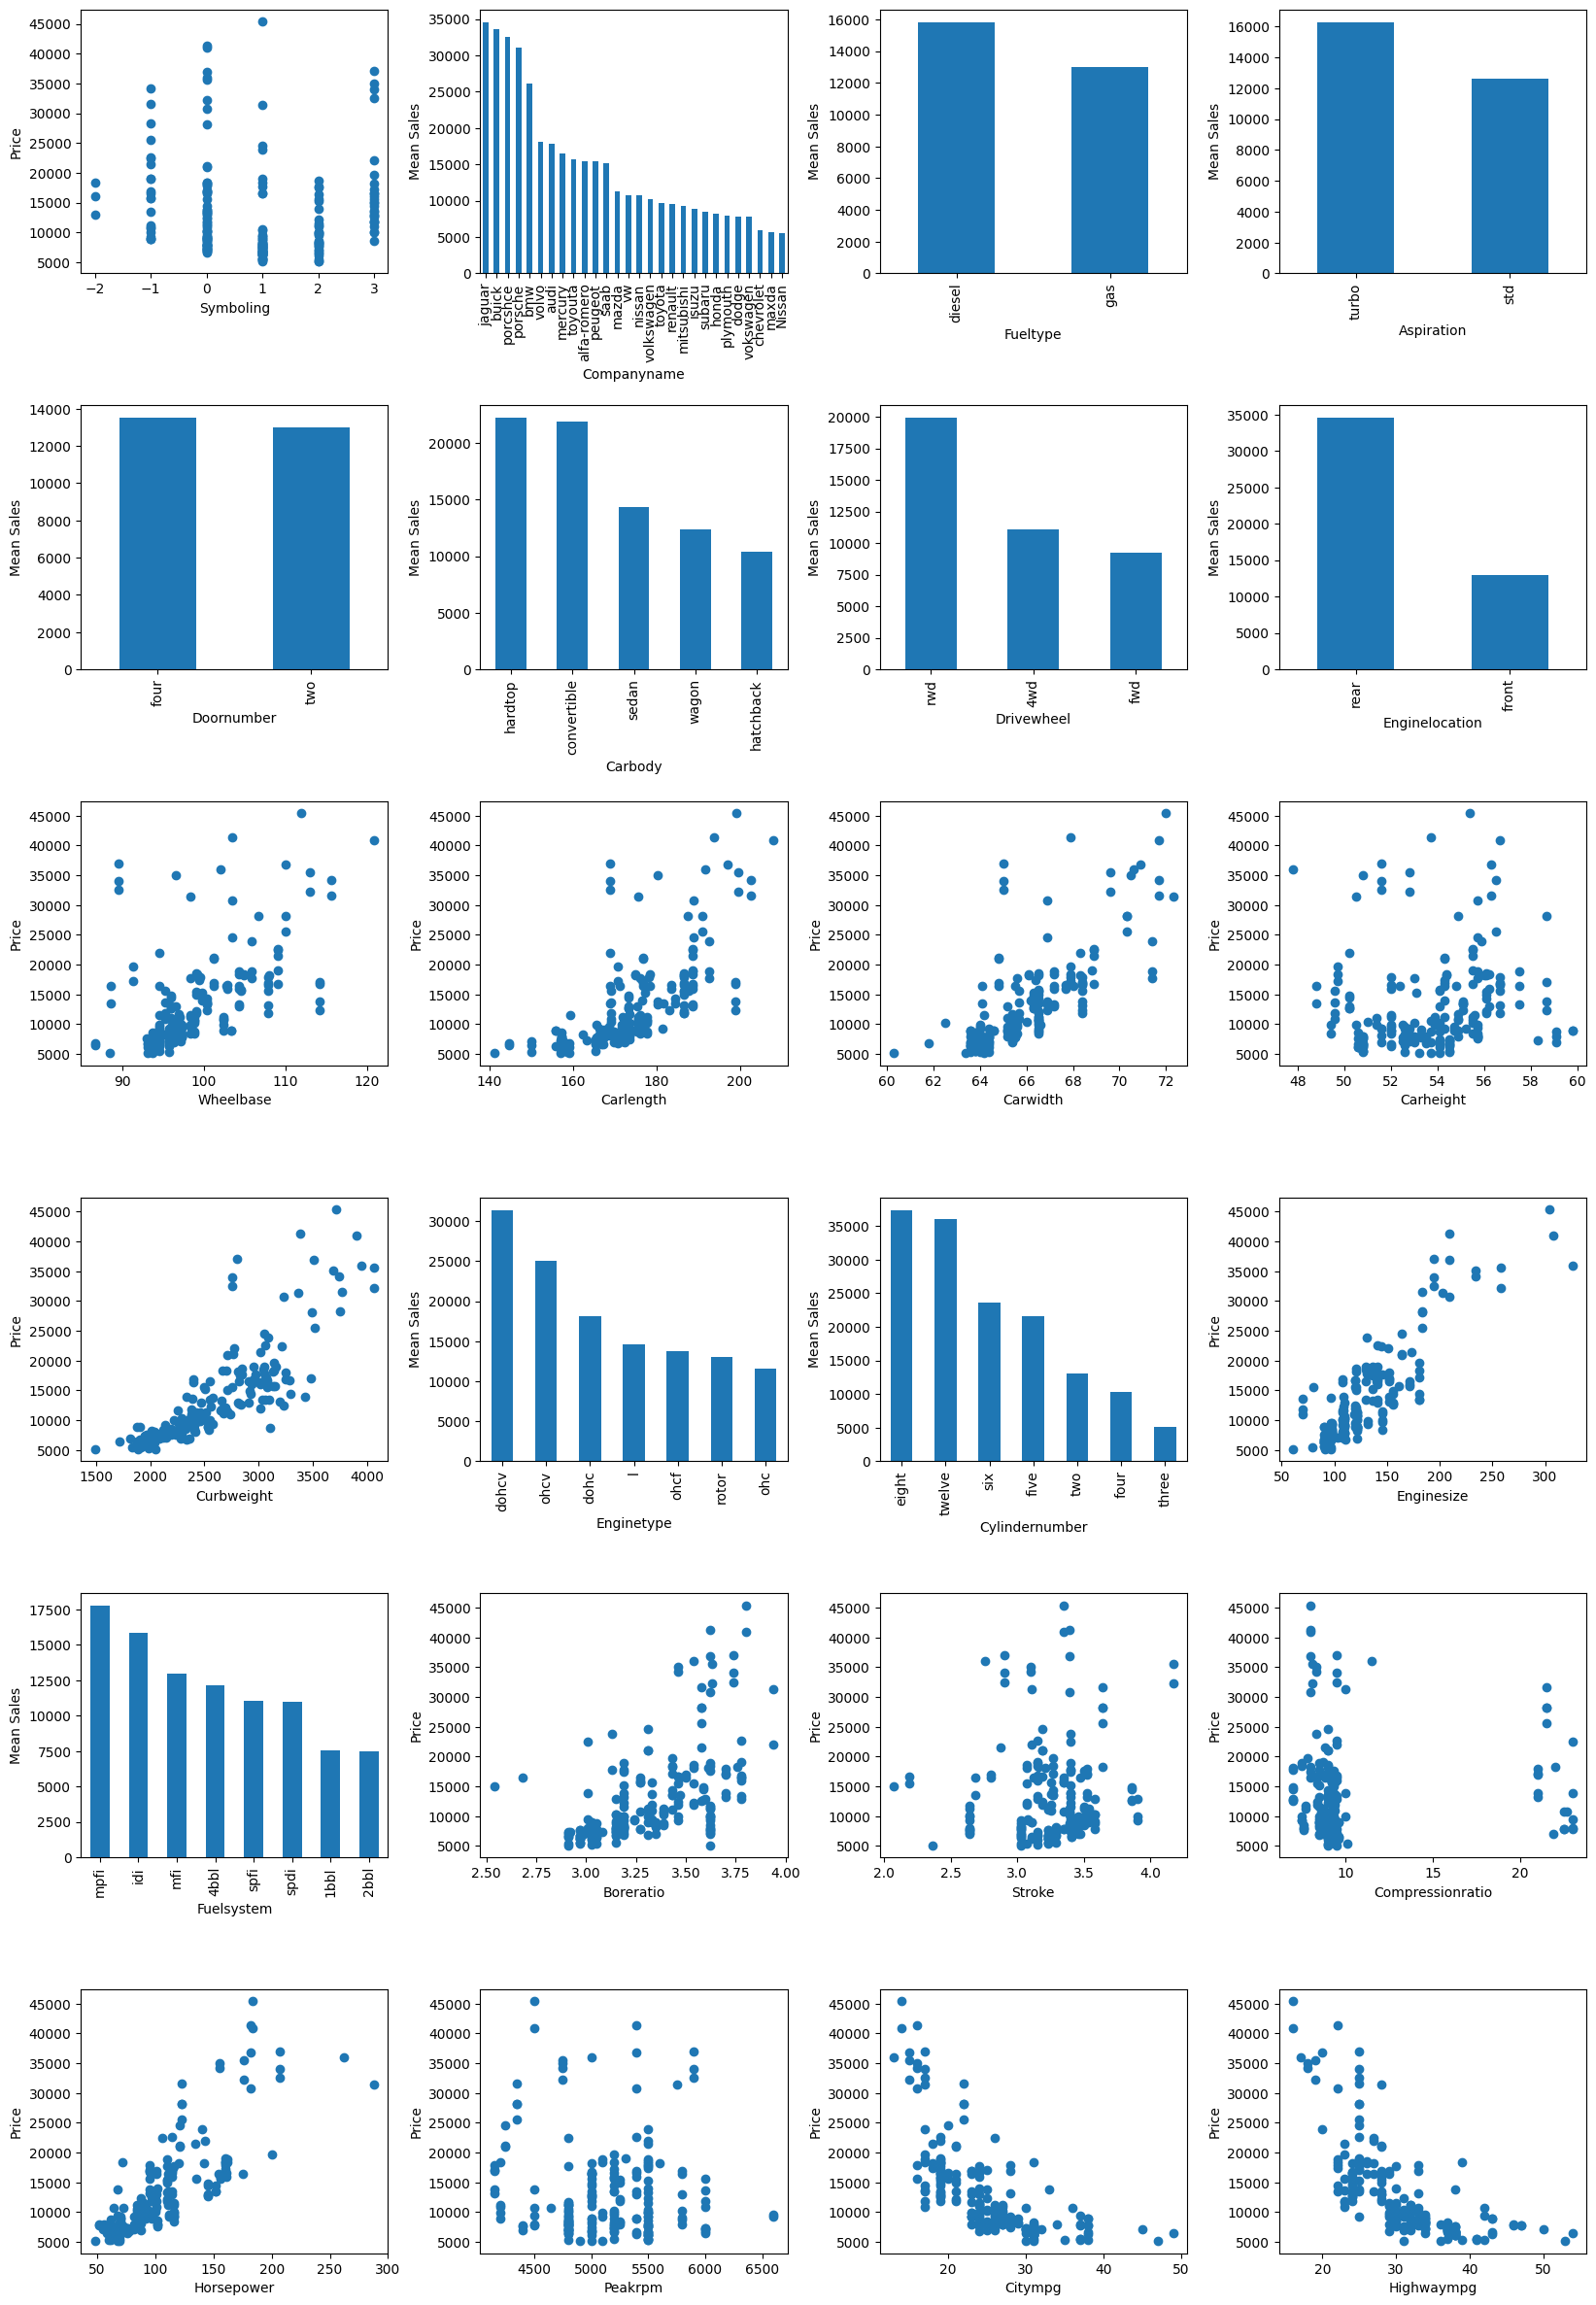

In [7]:
plt. subplots(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)
count=1
for feature in df.columns.drop(['price']):
    plt.subplot(6,4,count)
    if df[feature].dtypes == 'int64' or df[feature].dtypes == 'float64':
        plt.scatter(df[feature], df.price)
        plt.xlabel(feature.capitalize())
        plt.ylabel('Price')
        count = count + 1
    elif df[feature].dtypes == 'object':
        df_sorted = df.groupby([feature])['price'].mean().sort_values(ascending=False)
        df_sorted.plot(kind = 'bar', ylabel = 'Mean Sales',xlabel= feature.capitalize())
        count = count + 1

In [8]:
##Discussing the plots

# Regarding the monotony of the input variables and how it is correlated to the monotony of the target variable
# we can extract the below conclusions:

# -Symboling: by increasing symboling the price of the car is affected randomly.
# -Company name: the price is affected depending on the company name eg Porsche cars are more expensive than Nissan cars.
# -Fuel type: diesel cars are more expensive than gas cars.
# -Aspiration: turbo aspirated cars are more expensive than standard aspirated ones.
# -Door number: cars with four doors are more expensive than cars with two doors.
# -Carbody: hardtop, convertible, sedan, wagon, hatchback having the carbody in that order the price decreases.
# -Drivewheel: rear wheel drive cars are more expensive than four wheel drive cars and four wheel drive cars
#  are more expensive than front wheel drive cars.
# -Engine location: rear engine cars are more expensive than front engine cars.
# -Wheelbase: by increasing the wheelbase the price of the car increases.
# -Carlength: by increasing the length of the car the price of the car increases.
# -Carwidth: by increasing the width of the car the price of the car increases.
# -Carheight: it seems that by increasing the height of the car the price is affected randomly.
# -Curbweight: by increasing the curbweight the price of the car increases.
# -Enginetype: dohcv, ohcv, dohc, l, ohcf, rotor, ohc having the engine type in that order the price decreases.
# -Cylindernumber: eight, twelve, six, five, two, four, three having the number of the cylinders in that order
#  the price decreases.
# -Enginesize: by increasing the size of the engine the price of the car increases.
# -Fuelsystem: mpfi, idi, mfi, 4bbl, spfi, spdi, 1bbl, 2bbl having the fuel system types in that order the price decreases.
# -Boreratio: by increasing the bore ratio the price of the car increases.
# -Stroke: it seems that by increasing stroke the price is affected randomly.
# -Compressionratio: we have two groups of compression ratio, one that has a compression ratio 10 and below and one
#  that has compression ratio 20 and more. The price in these groups is affected randomly.
# -Horsepower: by increasing the horsepower the price of the car increases.
# -Peakrpm: it seems that by increasing the peak rpm the price is affected randomly.
# -Citympg: by increasing the citympg the price of the car decreases.
# -Highwaympg: by increasing the highwaympg the price of the car decreases.


### 2.4 Managing the categorical features

The existence of categorical features creates several problems, as the majority of data engineering and machine learning algorithms work only with numerical data. We can either drop the categorical features, or convert them to numerical ones. 
Here are the two required actions:

* Drop the `CompanyName` feature, and
* Convert the categorical features to numerical by applying one-hot-encoding. As mentioned in the class, in one-hot-encoding the first value of each encoded feature is not required. So to reduce dimensionality, remove this first value from each one-hot-encoded feature.

  **Hint:** If you are managing the data with Pandas dataframes, use the `get_dummies` method with `drop_first=True`.

After this process, the shape of the dataset must be 205 rows $\times$ 44 columns.


In [9]:
df_num = df.drop(['CompanyName'], axis=1)
df_num

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [10]:
df_numerical = pd.get_dummies(data = df_num,prefix='', prefix_sep='', sparse=False, drop_first = True)
df_numerical

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
df_numerical.shape

(205, 44)

### 2.5 Correlation with the target variables (numerical)

This is an important process, as it indicates the features that are strongly correlated to the target variable. There are several ways of estimating this correlation.

* Compute the Pearson coefficient that quantifies the pairwise correlations of the dataset columns (including the target variable).

In [12]:
correlation_matrix = df_numerical.corr(method='pearson')
correlation_matrix

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,...,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,...,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,...,-0.187445,0.100413,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,...,-0.183473,0.153516,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,...,-0.015076,-0.170181,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,...,-0.143903,0.187964,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,...,-0.111081,0.335555,-0.184762,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,...,-0.108774,0.054482,0.000127,-0.353342,0.000110,0.054451,0.070030,0.419335,-0.004213,0.025977
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,...,-0.050450,-0.110878,-0.000187,-0.234866,-0.000162,0.241829,0.144263,-0.110280,0.251259,-0.005688
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,...,-0.011354,0.023986,-0.026436,-0.183384,-0.022838,0.984356,-0.055528,-0.311035,-0.153726,-0.016654


* Identify the 8 features that have the strongest correlation with the target variable.

In [13]:
corr_values_abs = abs(correlation_matrix.price).sort_values(ascending=False).drop('price')
best_features = corr_values_abs[:8].index

best_corr_values = df_numerical[best_features].corrwith(df_numerical['price']).sort_values(ascending=False)
print(best_corr_values)


enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
citympg      -0.685751
highwaympg   -0.697599
four         -0.697762
dtype: float64


* Create a heatmap of the pairwise feature correlations like the following one.

**Hint:** use the `seaborn` library.


Text(0.5, 1.0, 'Correlation Metric For Numeric Features')

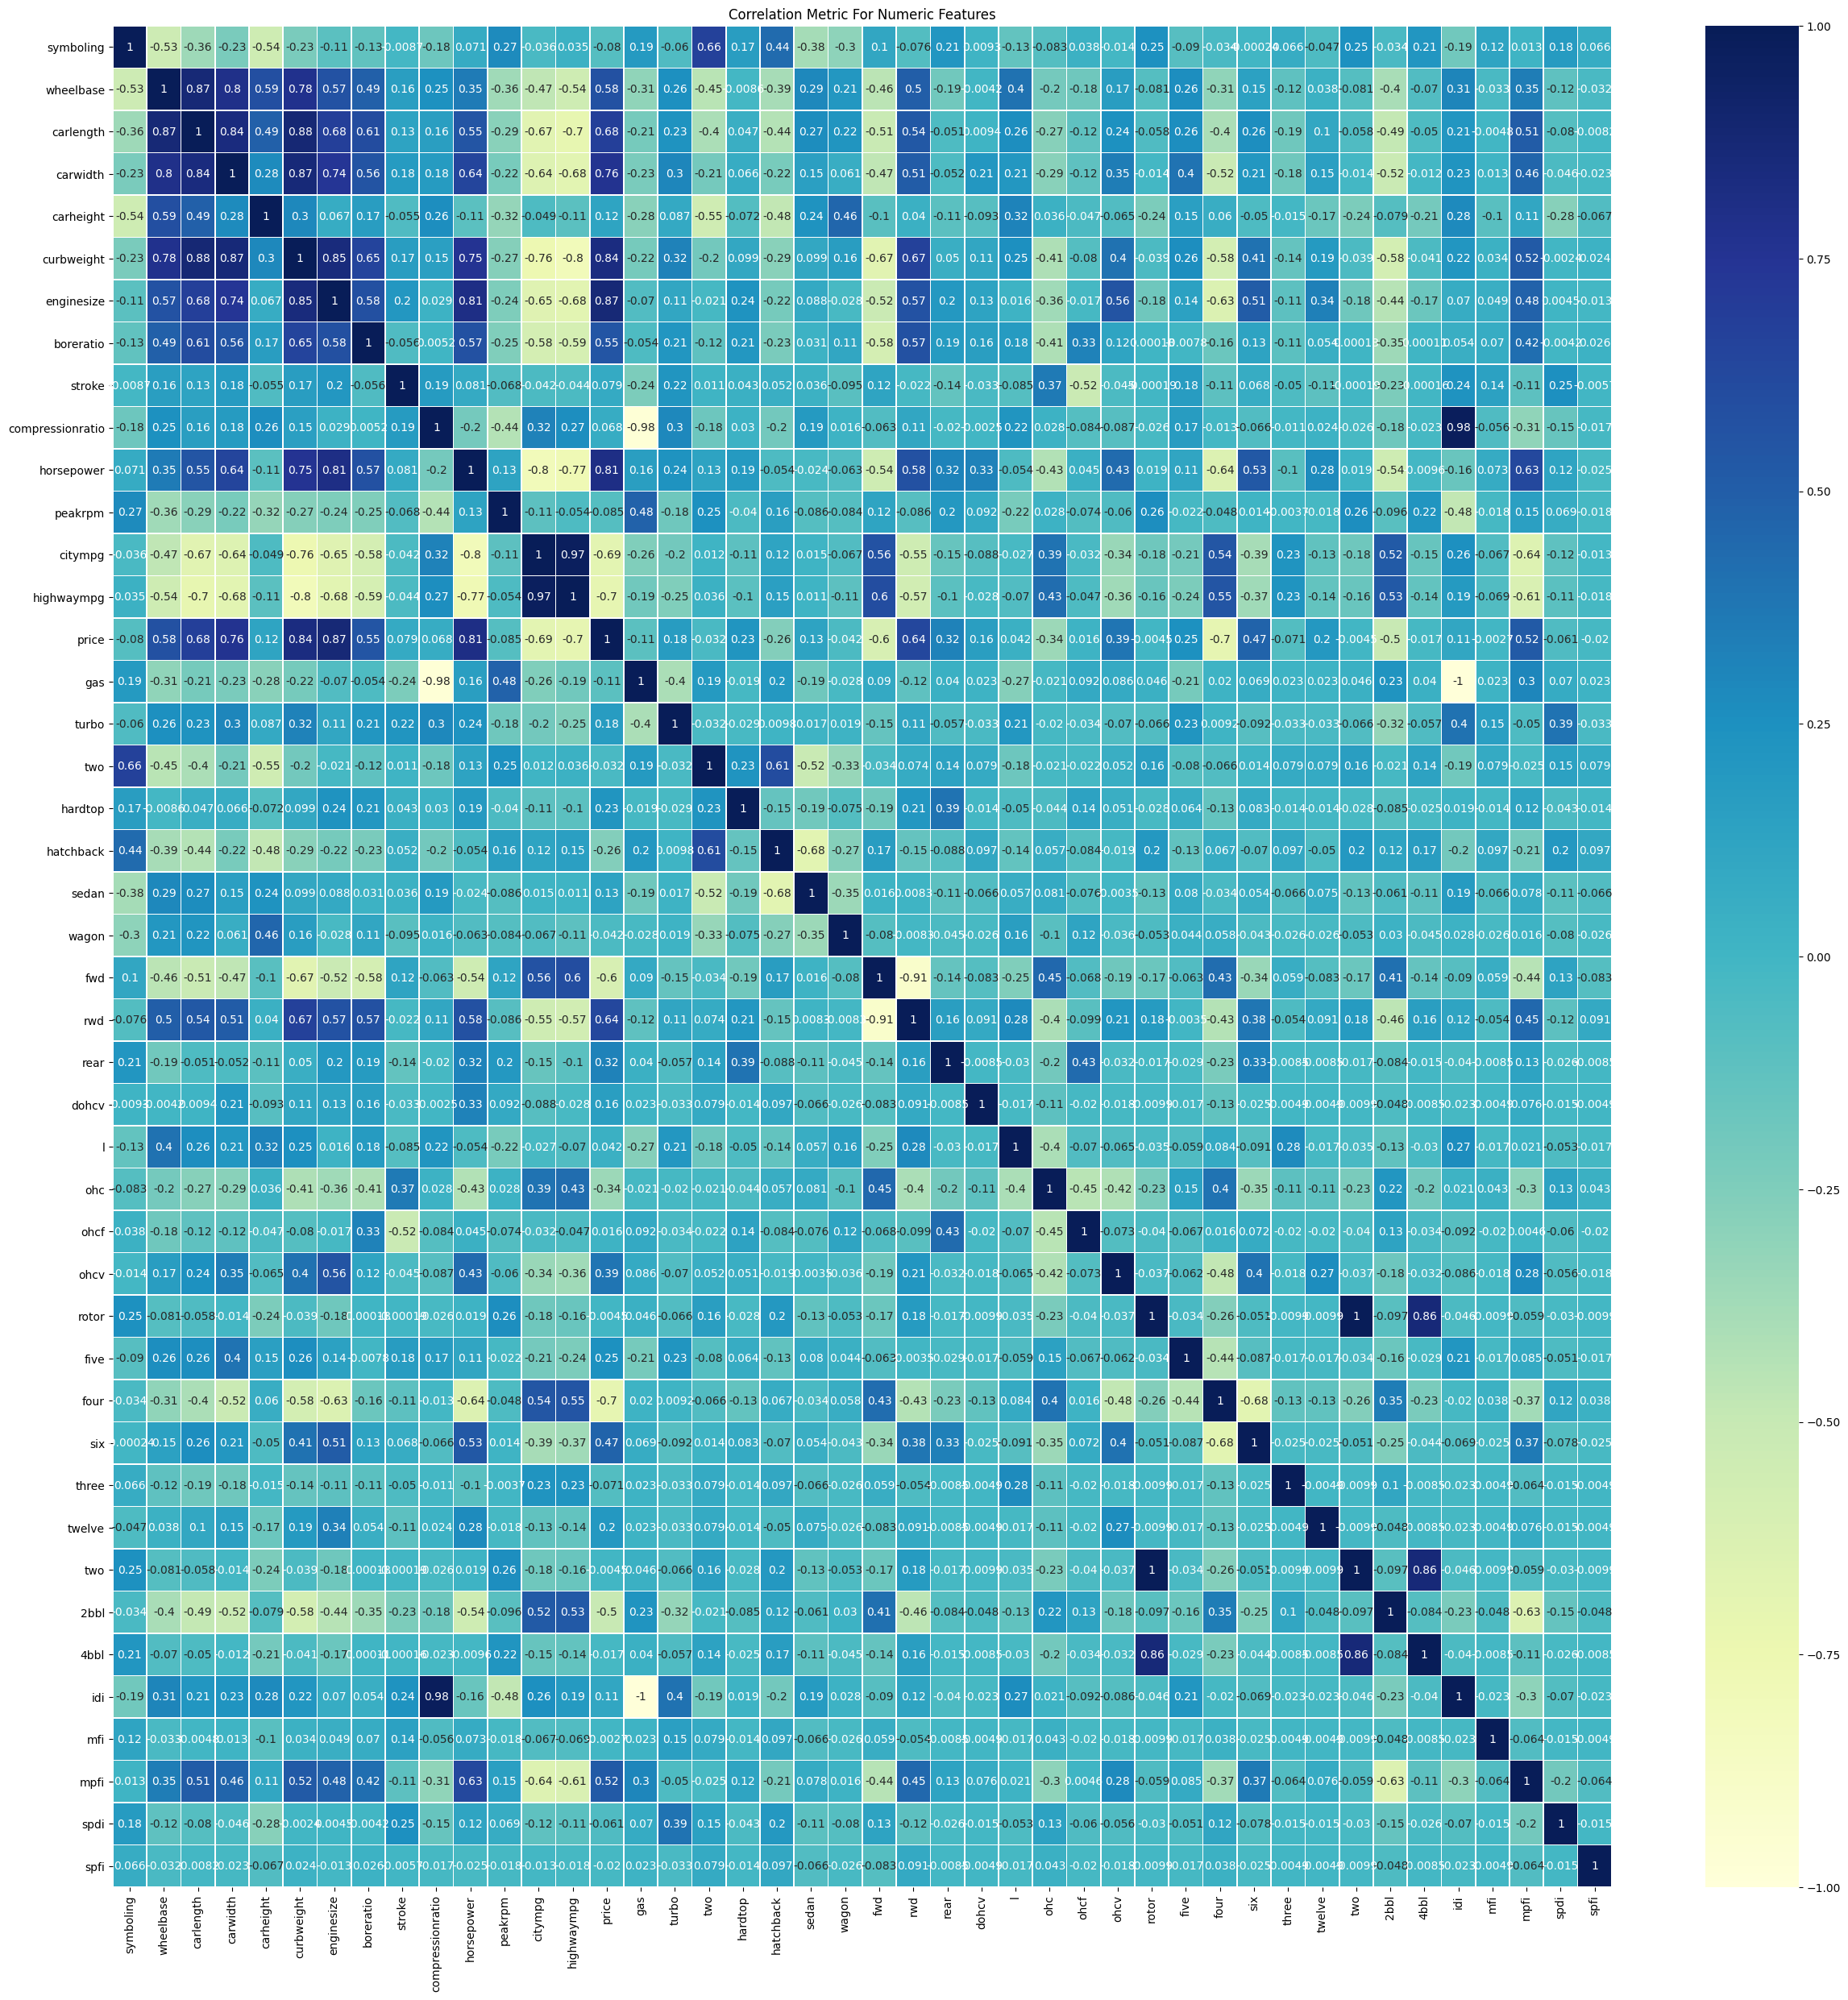

In [14]:
fig, ax = plt.subplots(figsize =(30,30))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot = True, linewidths=.5, ax = ax)
plt.title("Correlation Metric For Numeric Features")

# Task 3: Create a model to predict car prices

This is a typical Regression problem. You will experiment with the following scikit-learn algorithms:
* `LinearRegression`: Ordinary Least Squares Linear Regression.
* `Ridge`: Linear least squares with L2 regularization.
* `Lasso`: Linear Model trained with L1 prior as regularizer (aka the Lasso).
* `DecisionTreeRegressor`: Decision Tree for Regression problems.
* `RandomForestRegressor`: Random Forest for Regression problems.
* `MLPRegressor`: Multilayer Perceptron (feed-forward neural networks) for Regression problems.

Use 70% of the dataset for training and the rest 30% for testing.


Train the models by studying the effect of various hyper-parameters. Create a comparative table of Mean Squared Error, Mean Absolute Error, and R2 score for each algorithm. You must also present the results using bar plots (see the examples below).

**Note:** You will report only the best-performing results for each model. However, you must mention which settings you tried.

For example: <em>"We tried Decision Tree Regressor with max_depth=2, 3, 4, 5,... and we got the best results for max_depth=4. The results are..."</em>



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = df_numerical.drop('price', axis = 1)
y = df_numerical['price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

## We tried Linear Regression with fit_intercept=True (which is the default value) and fit_intercept=False and 
## we have got slightly better results with fit_intercept=True
reg = LinearRegression()

## We tried Ridge regression with a = 0.0001, 0.001, 0.01, 0.1, and 0.1 and we got the best results
## for a = 0.0001. However the difference of the r2 scores and the errors among the 3 smallest alphas
## (0.0001, 0.001, 0.01) is very small. So, we choose alpha = 0.01 in order to reduce the computational cost.
ridge_reg = Ridge(alpha = 0.01, random_state = 42)

## We tried Lasso regression with a = 0.005, 0.01, 0.05, and 0.1
## and we got the best results for a = 0.005, max_iter = 10700 and random_state = 42
lasso_reg = Lasso(alpha = 0.005, max_iter = 10700, random_state = 42)

## We tried Decision Tree Regressor with a range of max depth from 1 to 10, min samples split from 2 to 10
## and we got the best results for max depth = 10 and min samples split = 3 since we have lower MSE and higher r2 score.
dec_reg = DecisionTreeRegressor(max_depth = 10, min_samples_split = 3, random_state = 42)

## We tried Random Forest Regressor with min_samples_split = 2,3,4 and 5 and n_estimators = 100 and 200
## and we got the best results for min_samples_split = 3 and n_estimators = 100
rf_reg = RandomForestRegressor(n_estimators = 100, min_samples_split = 3, random_state = 42)

## We tried MLPRegressor with with alpha = 0.00005 and 0.0005,hidden_layer_sizes = (50,50), (100,) and (100,50)
## and max_iter=40000. We got the best results for alpha = 0.00005 and hidden_layer_sizes = (50,50)
MLP_reg = MLPRegressor(max_iter=5000,learning_rate_init=0.02,random_state=42,solver='adam')

RMSE = []
MSE = []
MAE = []
R2 = []
methods=[reg,ridge_reg,lasso_reg,dec_reg,rf_reg,MLP_reg]
def evaluate_models(methods,train_X, train_y,test_X, test_y, RMSE, MSE, MAE, R2):
    
    # model fitting and measuring RMSE
    for i in range(len(methods)):
        # fit
        method_reg = methods[i].fit(train_X, train_y)
        # predict
        pred = methods[i].predict(test_X)
        # RMSE, MSE, MAE, R2 calculation
        RMSE.append(np.sqrt(mean_squared_error(test_y,pred)))
        MSE.append(mean_squared_error(test_y,pred))
        MAE.append(mean_absolute_error(test_y,pred))
        R2.append(methods[i].score(test_X, test_y))
    
    return RMSE, MSE, MAE, R2
    
#Def call
evaluate_models(methods,train_X, train_y,test_X, test_y, RMSE, MSE, MAE, R2)

#visualizing the res
df_models = pd.DataFrame({'Classifier': ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
                                         'Decision Tree', 'Random Forest', 'Multilayer Perceptron'],
                          'RMSE':RMSE, 'MSE':MSE,'MAE': MAE, 'R2':R2},index=['0','1','2','3','4','5'])

df_models

,Classifier,RMSE,MSE,MAE,R2
0,Linear Regression,2655.566359,7.052033e+06,1889.805133,0.898216
1,Ridge Regression,2669.413381,7.125768e+06,1899.640169,0.897152
2,Lasso Regression,2655.742825,7.052970e+06,1889.940583,0.898203
3,Decision Tree,2770.786517,7.677258e+06,1863.151876,0.889192
4,Random Forest,1945.503408,3.784984e+06,1350.611575,0.945370
5,Multilayer Perceptron,3002.053189,9.012323e+06,1922.600542,0.869923


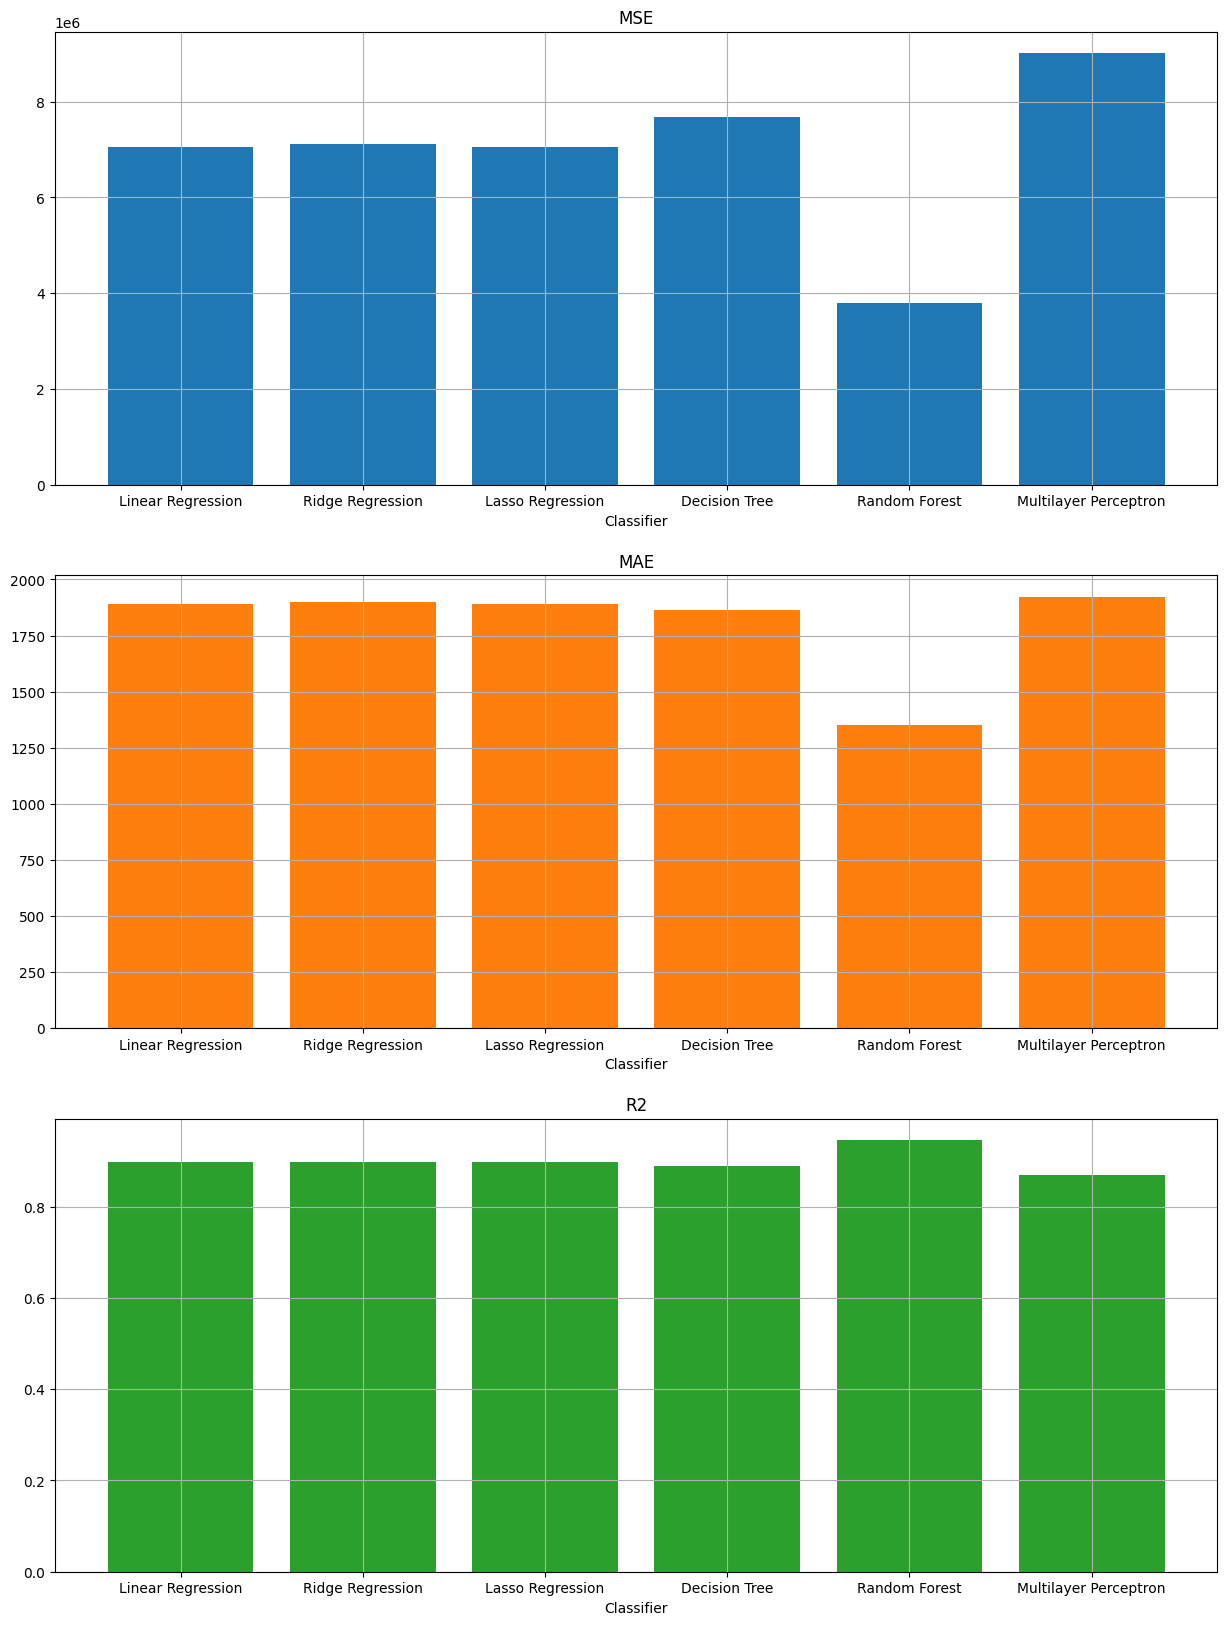

In [16]:
plt. subplots(figsize=(15, 20))
count = 1
palette = ('tab:blue', 'tab:orange', 'tab:green')
for column in df_models.columns.drop(['Classifier', 'RMSE']):
    plt.subplot(3,1,count)
    plt.bar(df_models.Classifier,df_models[column], color = palette[count-1])
    plt.xlabel('Classifier')
    plt.title(column)
    plt.grid()
    count = count + 1

# Task 4: Standardization

Standardize the data and repeat all the experiments **by using the same hyper-parameters for the models**. Again, report the values of Mean Squared Error, Mean Absolute Error, and R2 score.

Compare the performance of the models and discuss your conclusions. How do the models compare when they operate on standardized and non-standardized data?

In [17]:
#standardization (1/2)
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = train_X.copy()
X_test_stand = test_X.copy()

# numerical features
#num_cols = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
num_cols = []
for feature in df.columns.drop(['price']):
    if df[feature].dtypes == 'int64' or df[feature].dtypes == 'float64':
        num_cols.append(feature)

# apply standardization on numerical features
for i in num_cols:
    #print(i)
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])
X_test_stand

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
15,-0.6875,0.755053,1.160219,0.419073,0.772194,1.261697,1.985547,1.103378,0.432331,-0.531628,...,0,0,0,0,0,0,0,1,0,0
9,-0.6875,0.094165,0.286704,0.878992,-0.724940,0.921665,0.096534,-0.702173,0.464973,-0.799587,...,0,0,0,0,0,0,0,1,0,0
100,-0.6875,-0.285846,-0.101526,-0.362789,0.367563,-0.521071,-0.169866,0.034787,0.693464,-0.397648,...,0,0,0,1,0,0,0,0,0,0
132,1.7500,0.028076,0.966105,0.235105,0.934046,0.162836,-0.145647,0.808594,-0.612203,-0.180601,...,0,0,0,0,0,0,0,1,0,0
68,-1.5000,1.828996,1.313893,1.982797,1.986087,2.260663,1.355876,0.955986,1.248373,3.085824,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.7500,-0.599767,-0.457402,-0.132830,-1.696054,-0.371227,-1.380772,0.034787,-0.008332,-0.156485,...,0,0,1,0,1,0,0,0,0,0
128,1.7500,-1.558055,-0.465490,-0.454773,-0.886792,0.435630,1.622276,1.545553,-1.167111,-0.129689,...,0,0,0,0,0,0,0,1,0,0
76,0.9375,-0.864123,-1.403711,-0.730724,-1.210497,-1.258769,-0.847973,-1.291740,-0.089936,-0.156485,...,0,0,0,1,0,0,0,0,0,0
144,-0.6875,-0.318890,-0.214759,-0.270805,0.205711,-0.361621,-0.460483,1.103378,-2.015795,-0.263668,...,0,0,0,1,0,0,0,0,0,0


In [18]:
#standardization (2/2)
RMSE_stand = []
MSE_stand = []
MAE_stand = []
R2_stand = []

#Def run (from task 3 - methods, train_y and test_y are the same as those in task 3)
evaluate_models(methods,X_train_stand, train_y,X_test_stand, test_y, RMSE_stand, MSE_stand, MAE_stand, R2_stand)

#visualizing the result
df_stand_models = pd.DataFrame({'Classifier': ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
                                               'Decision Tree', 'Random Forest', 'Multilayer Perceptron'],
                                'RMSE_stand':RMSE_stand, 'MSE_stand':MSE_stand, 'MAE_stand': MAE_stand,
                                'R2_stand':R2_stand},index=['0','1','2','3','4','5'])
df_stand_models

C:\Users\sisma\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Classifier,RMSE_stand,MSE_stand,MAE_stand,R2_stand
0,Linear Regression,2655.566359,7.052033e+06,1889.805133,0.898216
1,Ridge Regression,2669.546483,7.126478e+06,1899.870398,0.897142
2,Lasso Regression,2655.752694,7.053022e+06,1889.961419,0.898202
3,Decision Tree,2801.797884,7.850071e+06,1874.756715,0.886698
4,Random Forest,1929.993322,3.724874e+06,1347.552895,0.946238
5,Multilayer Perceptron,2356.618263,5.553650e+06,1635.025654,0.919843


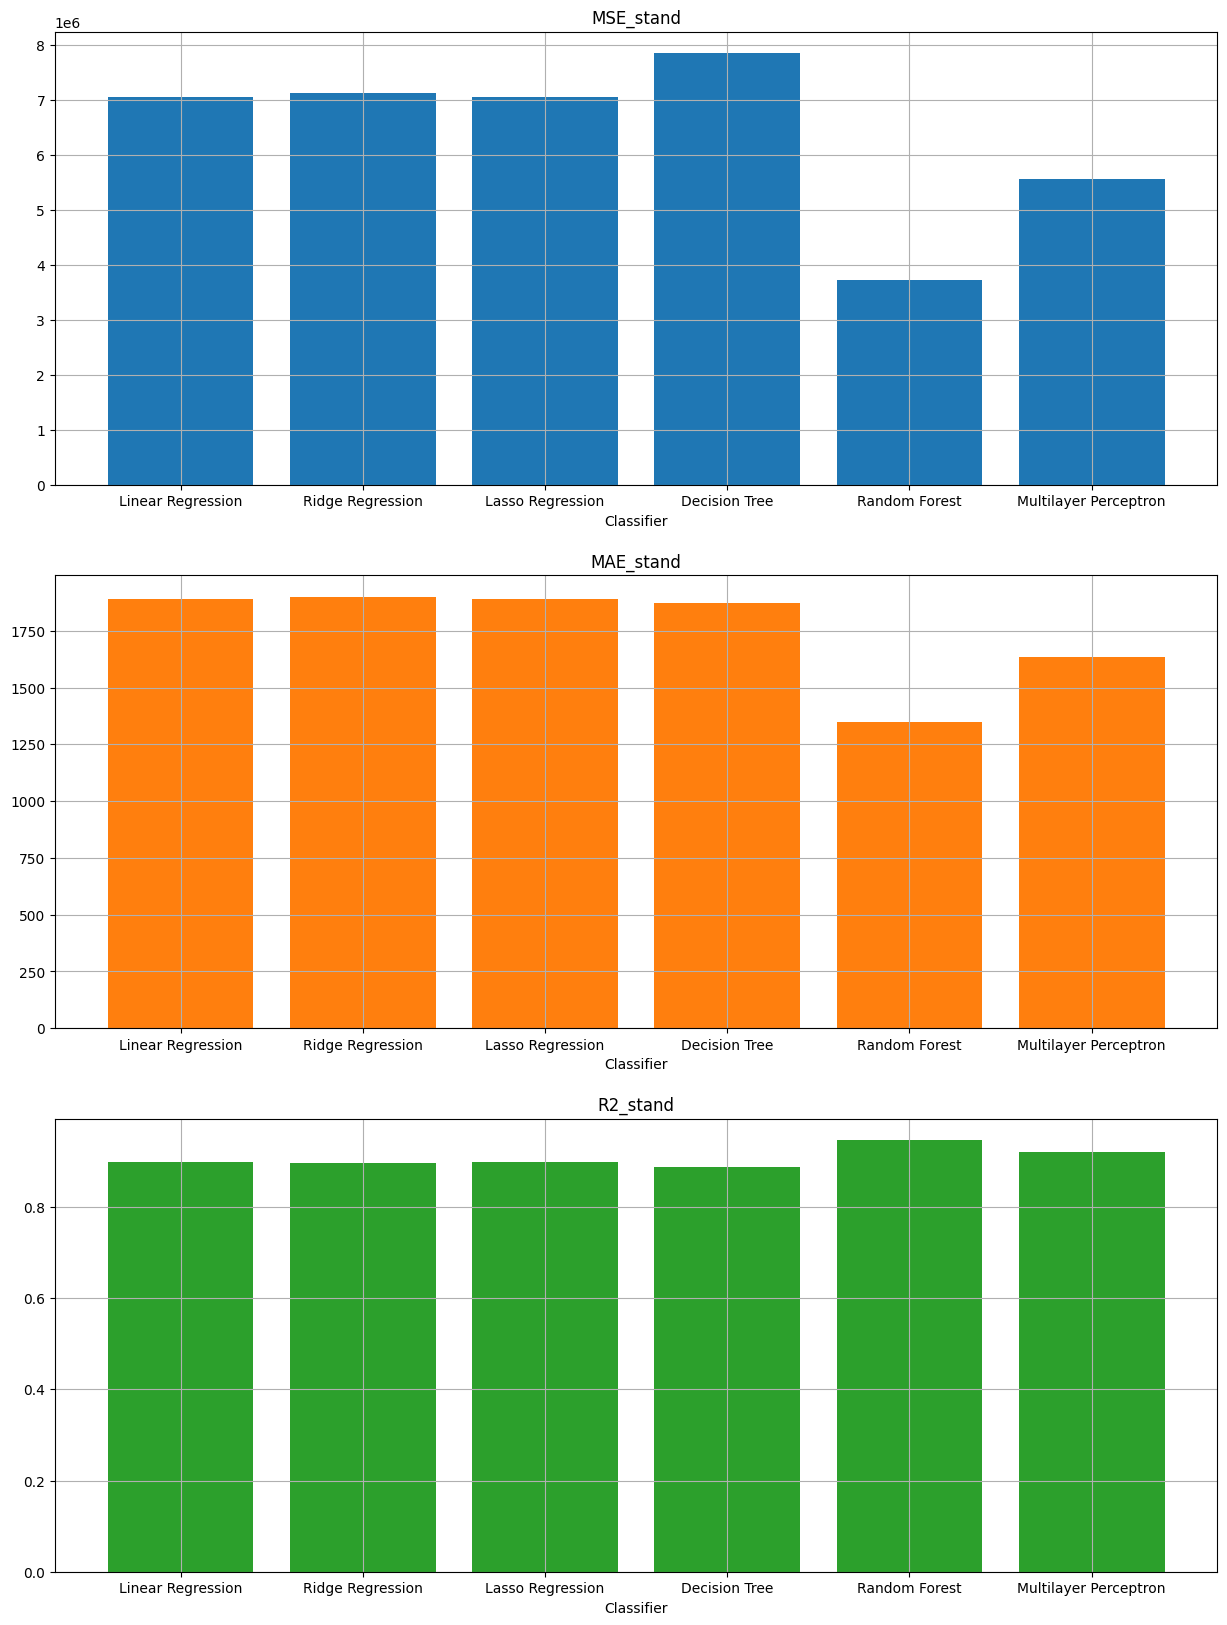

In [19]:
plt. subplots(figsize=(15, 20))
count = 1
palette = ('tab:blue', 'tab:orange', 'tab:green')
for column in df_stand_models.columns.drop(['Classifier', 'RMSE_stand']):
    plt.subplot(3,1,count)
    plt.bar(df_stand_models.Classifier,df_stand_models[column], color = palette[count-1])
    plt.xlabel('Classifier')
    plt.title(column)
    plt.grid()
    count = count + 1

In [20]:
df_comp = pd.concat([df_models,df_stand_models.drop('Classifier', axis = 1)],axis = 1)
df_comp

,Classifier,RMSE,MSE,MAE,R2,RMSE_stand,MSE_stand,MAE_stand,R2_stand
0,Linear Regression,2655.566359,7.052033e+06,1889.805133,0.898216,2655.566359,7.052033e+06,1889.805133,0.898216
1,Ridge Regression,2669.413381,7.125768e+06,1899.640169,0.897152,2669.546483,7.126478e+06,1899.870398,0.897142
2,Lasso Regression,2655.742825,7.052970e+06,1889.940583,0.898203,2655.752694,7.053022e+06,1889.961419,0.898202
3,Decision Tree,2770.786517,7.677258e+06,1863.151876,0.889192,2801.797884,7.850071e+06,1874.756715,0.886698
4,Random Forest,1945.503408,3.784984e+06,1350.611575,0.945370,1929.993322,3.724874e+06,1347.552895,0.946238
5,Multilayer Perceptron,3002.053189,9.012323e+06,1922.600542,0.869923,2356.618263,5.553650e+06,1635.025654,0.919843


Text(0.5, 0, 'Classifier')

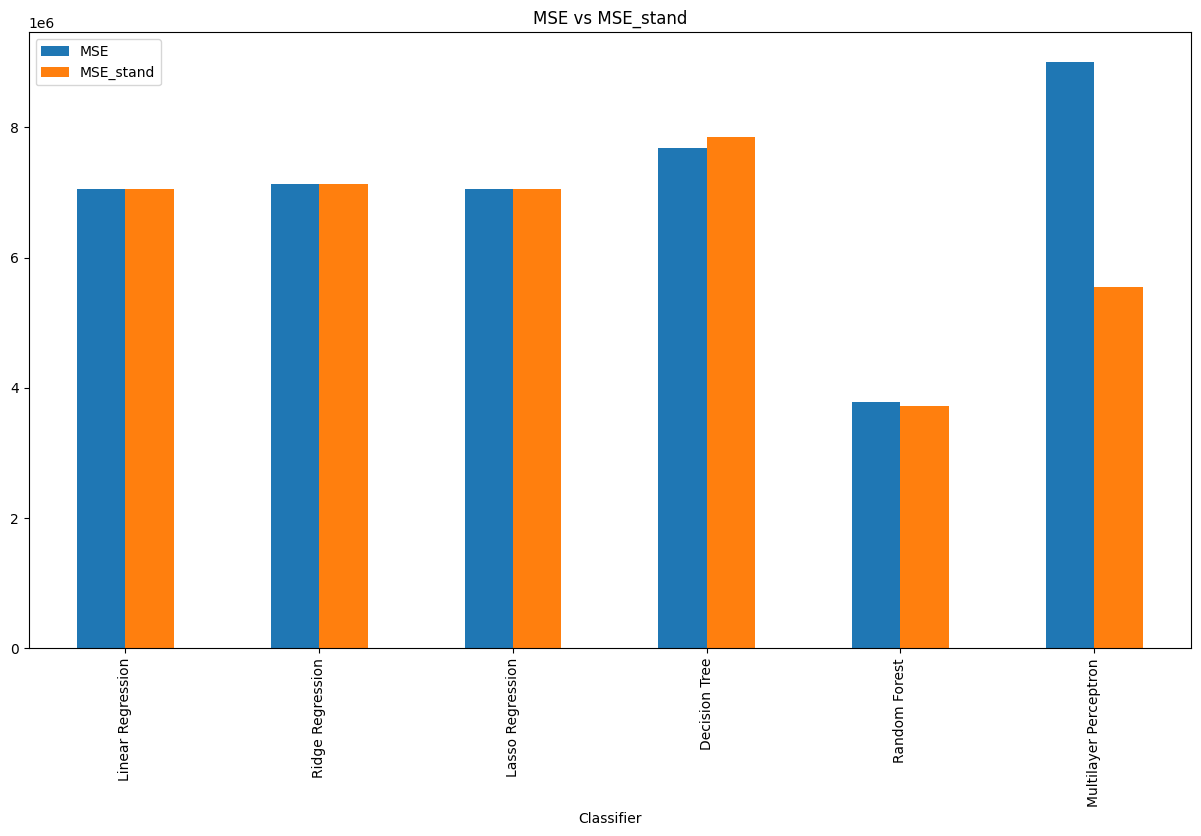

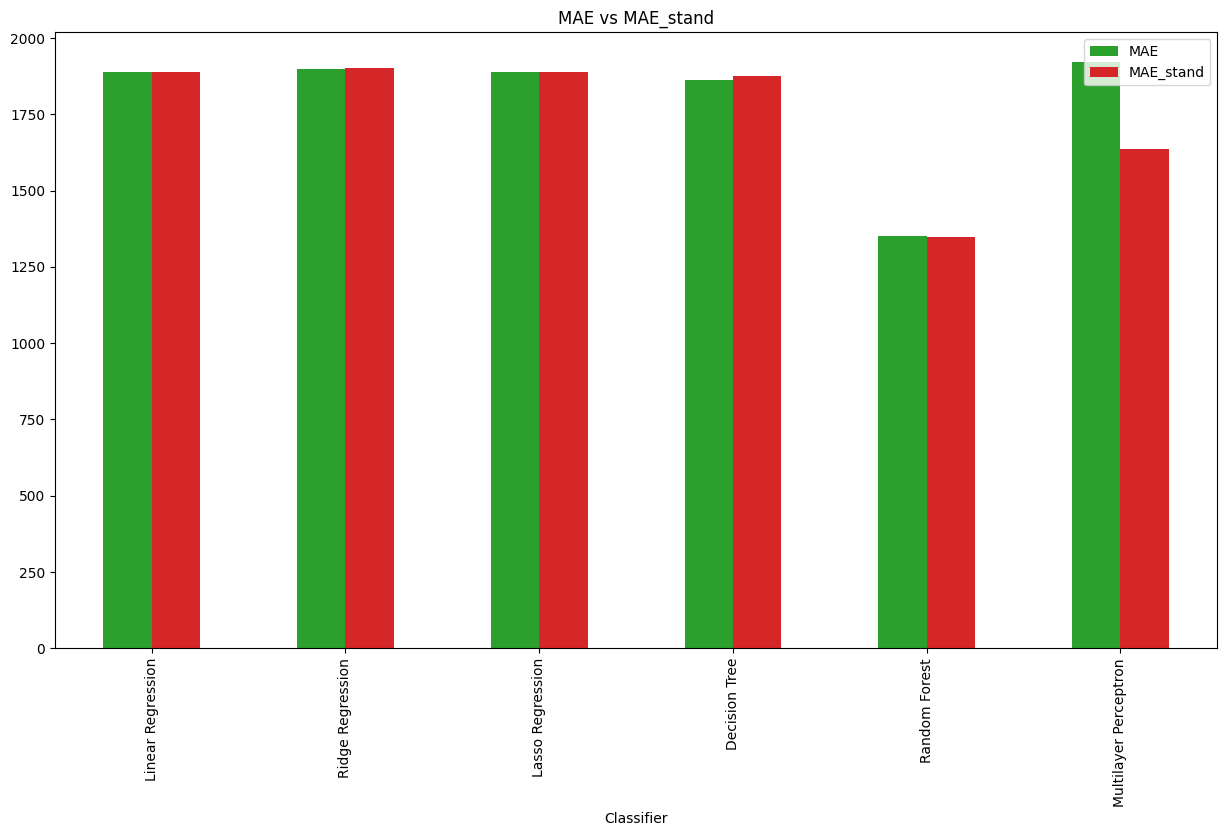

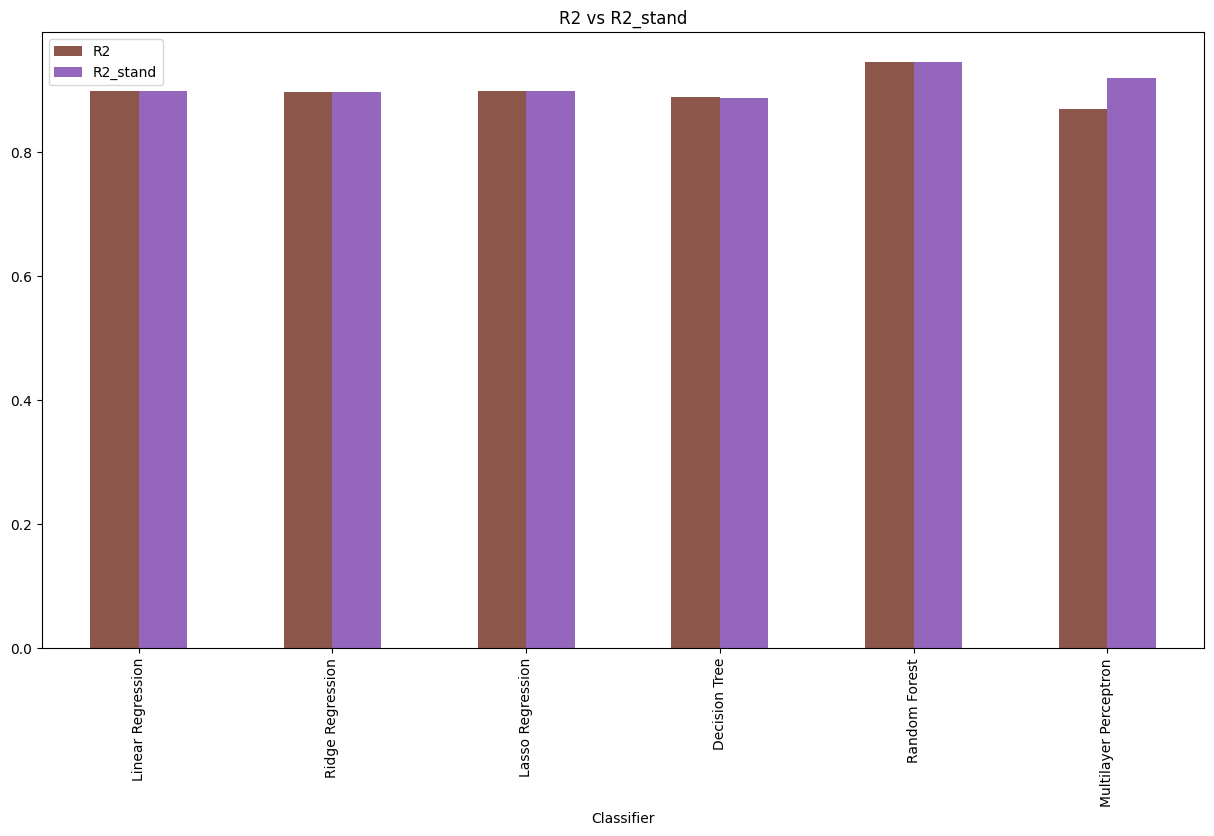

In [21]:
df_comp.plot(kind = 'bar', x = 'Classifier', y = ['MSE' , 'MSE_stand'], color = ['tab:blue' , 'tab:orange'], figsize=(15, 8))
plt.title('MSE vs MSE_stand')
df_comp.plot(kind = 'bar', x = 'Classifier', y = ['MAE' , 'MAE_stand'], color = ['tab:green' , 'tab:red'], figsize=(15, 8))
plt.title('MAE vs MAE_stand')
df_comp.plot(kind = 'bar', x = 'Classifier', y = ['R2' , 'R2_stand'], color = ['tab:brown' , 'tab:purple'], figsize=(15, 8))
plt.title('R2 vs R2_stand')
plt.xlabel('Classifier')

In [22]:
## Discussing the results
# Based on the results, the Random Forest model seems to be the best fit for this dataset.
# It has the lowest mean squared error, mean absolute error and highest R-squared score,
# which means it has the best accuracy in predicting the target variable (price).
# When the data was standardized, Random Forest model also performed the best,
# although its performance slightly dropped.

# On the other hand, the performance of MLP regressor changed significantly when the data was standardized.
# It performed significantly worse on the standardized data than on the non-standardized data, which may indicate
# that this model is sensitive to the scale of the input features and may perform better with non-standardized data.
# A possible reason behind the significant drop in the performance of MLPregressor is that we used
# the StandardScaler methon instead of MinMaxScaler.

# The performance of the other models (Linear, Ridge, Lasso and Decision Tree) did not change significantly after
# standardizing the data. Since, Linear, Ridge and Lasso regressions are all linear models, it seems that they are
# not affected by the scale of the input feature resulting in almost the same performance after standardization.
# The same also applies to the DecisionTree regressor which semmes that it is unaffected by the scale of the input feature.

# Task 5: Dimensionality Reduction

In this task you will study the effect of dimensionality reduction in the performance of our regression models. More specifically, you will create a **new target space with 8 dimensions** by applying the following two techniques **on the standardized data**.

* Principle Component Analysis (PCA) with 8 target variables.
* Manually keep the best 8 features that derived from task 2.5. These are the 8 features that achieved the highest Pearson coefficient values with the target variable.

Compare the performance of the models on the reduced dimensional space against the original dimensional space. Discuss the results.


In [23]:
from sklearn.decomposition import PCA

# instantiate PCA object
pca = PCA(n_components=8)

# fit and transform training data
train_X_pca = pca.fit_transform(X_train_stand)

# transform test data
test_X_pca = pca.transform(X_test_stand)

In [24]:
#Principle Component Analysis (PCA) with 8 target variables (3/4)

#explains the variance ratio by 8 principal components
np.sum(pca.explained_variance_ratio_)

0.8735506598166564

In [25]:
RMSE_pca = []
MSE_pca = []
MAE_pca = []
R2_pca = []


evaluate_models(methods, train_X_pca, train_y, test_X_pca, test_y, RMSE_pca, MSE_pca, MAE_pca, R2_pca)

df_models_pca = pd.DataFrame({'Classifier': ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
                                             'Decision Tree', 'Random Forest', 'Multilayer Perceptron'],
                              'RMSE_PCA':RMSE_pca, 'MSE_PCA':MSE_pca, 'MAE_PCA': MAE_pca, 'R2_PCA':R2_pca},
                             index=['0','1','2','3','4','5'])
df_models_pca

C:\Users\sisma\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Classifier,RMSE_PCA,MSE_PCA,MAE_PCA,R2_PCA
0,Linear Regression,4227.625706,1.787282e+07,3054.627810,0.742037
1,Ridge Regression,4227.655448,1.787307e+07,3054.653592,0.742033
2,Lasso Regression,4227.626180,1.787282e+07,3054.628372,0.742037
3,Decision Tree,3298.741609,1.088170e+07,2271.131726,0.842942
4,Random Forest,2691.406216,7.243667e+06,1849.366362,0.895450
5,Multilayer Perceptron,3499.947475,1.224963e+07,2327.113629,0.823198


In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Select 8 best features based on their correlation with the target variable
selector = SelectKBest(f_regression, k=8)
selector.fit(X_train_stand,train_y)

# Transform train and test data using only the selected 8 features
train_X_selected = selector.transform(X_train_stand)
test_X_selected = selector.transform(X_test_stand)
# Get the selected feature indices
selected_features = selector.get_support(indices=True)

# Get the feature names
feature_names = X.columns

# Print the names of the selected features
print("Selected features:")
for i in selected_features:
    print("- " + feature_names[i])





Selected features:
- carlength
- carwidth
- curbweight
- enginesize
- horsepower
- citympg
- highwaympg
- four


C:\Users\sisma\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in divide
  correlation_coefficient /= X_norms


In [27]:
RMSE_mpca = []
MSE_mpca = []
MAE_mpca = []
R2_mpca = []


evaluate_models(methods, train_X_selected, train_y, test_X_selected, test_y, RMSE_mpca, MSE_mpca, MAE_mpca, R2_mpca)

df_models_mpca = pd.DataFrame({'Classifier': ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
                                             'Decision Tree', 'Random Forest', 'Multilayer Perceptron'],
                              'RMSE_MPCA':RMSE_mpca, 'MSE_MPCA':MSE_mpca, 'MAE_MPCA': MAE_mpca, 'R2_MPCA':R2_mpca},
                             index=['0','1','2','3','4','5'])
df_models_mpca

C:\Users\sisma\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Classifier,RMSE_MPCA,MSE_MPCA,MAE_MPCA,R2_MPCA
0,Linear Regression,3761.647864,1.414999e+07,2543.834129,0.795769
1,Ridge Regression,3761.772305,1.415093e+07,2543.992641,0.795756
2,Lasso Regression,3761.646487,1.414998e+07,2543.836548,0.795769
3,Decision Tree,2955.494236,8.734946e+06,1953.416981,0.873926
4,Random Forest,2016.337006,4.065615e+06,1345.559270,0.941320
5,Multilayer Perceptron,3382.014841,1.143802e+07,2136.898789,0.834912


In [28]:
## Discussing the results

# In general, the models trained on the original dimensional space have better performance in terms of mean squared error,
# mean absolute error and r-squared score compared to the models trained with PCA. This is because the PCA model may not
# capture all the important information and relationships in the data, leading to a reduction
# in the accuracy of the models. 

# From the results, it can be concluded that using a reduced dimensional space of 8 manually kept features results is in
# lower performance compared to using the original dimensional space except decision tree which has better results and
# Random Forest regressor which has mostly the same results. However, it's important to consider the trade-off between
# accuracy and interpretability when deciding whether to use PCA or the original dimensional space in a particular problem.
# Overall, it can be concluded that the best performing model is the Random Forest regressor in the 8 manually dimensional
# space combining high performance and computational efficiency. Additionally, the faster computation time of this model
# makes it even more attractive. 
